# The PyData Stack

In this lab, you should analyze the famous [Boston Housing Dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html).  Here's what you should do:

* Load the data into a DataFrame and determine the purpose of the dataset.
* Determine some basic statistics about the features.  Is there any missing data?  How do you know?
* Decide what all the features mean, and their type (hint: explore the stats of each, and the object returned by `load_boston` in the link above).
* Graph histograms of a few appropriate features, and describe what you see.
* Graph scatter plots of the numerical features against the median house price.  What do you take from these graphs?
* Slice the dataset _horizontally_, that is, use boolean indexing to create a sub-DataFrame from your data.  You should find a way to slice it that does something nontrivial: describe why what you've done is interesting (take a look at some of our previous notebooks for examples).
* Create another graph that justifies that the above is interesting.
* Knowing that this datset is typically used in regression to predict the value of the house, slice the data _vertically_, that is, remove some columns that you believe are not helpful for this task.  Justify your reasoning (from the steps you've taken before this).
* Throughout all of the above, discuss what you're seeing in markdown cells, and use markdown appropriately to create headers to break up the analysis.  It's okay if you're wrong or just confused/unsure about your observations--this lab is about experimentation and playfulness with data!

### Citations
* Dr. Z used as reference for boolean indexing, video about boolean indexing: https://www.youtube.com/watch?v=s4HxlWWVFRU
* Website https://www.pluralsight.com/guides/a-lap-around-the-pydata-stack used for background info about PyData Stack
* Stack Overflow used for information about dropping columns https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe, shared by Dakota Chang

In [1]:
#Import statments
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from sklearn import datasets
from sklearn.linear_model import LinearRegression

In [2]:
#load the dataset, load that into a dataframe, determine the purpose of the dataset
boston_housing = datasets.load_boston()

X = boston_housing.data

df = pd.DataFrame(X, columns=boston_housing['feature_names'])

#Print a description of the data 
print(boston_housing['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

After looking at the description of the columns of this dataset and reading Dr. Z's shared article, there are many problematic aspects of this dataset. Specifically, the B, LTSAT, DIS and CHAS columns seem to be racially charged to say the least, and therefore I will be dropping them from the dataset

In [3]:
#Get column names to be removed
print(df.columns)

#Dropping columns of compromised data (B, LSTAT, DIS, CHAS)
df.drop('B', axis=1, inplace=True)
df.drop('LSTAT', axis=1, inplace=True)
df.drop('DIS', axis=1, inplace=True)
df.drop('CHAS', axis=1, inplace=True)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


In [4]:
#rename target feature to "PRICE", which is more accurate to what it represents
df['PRICE'] = boston_housing['target']

#View the new-look dataset
df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,PRICE
0,0.00632,18.0,2.31,0.538,6.575,65.2,1.0,296.0,15.3,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,2.0,242.0,17.8,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,2.0,242.0,17.8,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,3.0,222.0,18.7,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,3.0,222.0,18.7,36.2


In the above code block, I check that all columns have been dropped correctly, and rename the target feature to a more accurate name: 'PRICE'. By dropping problematic columns, many of my ethical concerns have been resolved and I can move on to analyzing the data.

In [5]:
df['AGE'].describe()

count    506.000000
mean      68.574901
std       28.148861
min        2.900000
25%       45.025000
50%       77.500000
75%       94.075000
max      100.000000
Name: AGE, dtype: float64

In the above code block, I view the description of the AGE feature of the dataset to get a good sense of how it should be graphed. Its distribution between minimum, 25%, 50%, 75% and max is relatively even and has a very manageable range (0-100), so I don't think I will have to do any manipluation to graph the AGE data in a clear fashion.

Text(0, 0.5, 'Price')

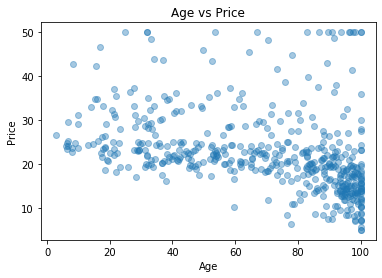

In [6]:
#plot data in a scatterplot
plt.scatter(df['AGE'], df['PRICE'], alpha = 0.4)
plt.title("Age vs Price")
plt.xlabel("Age")
plt.ylabel("Price")

In the above graph, I compare the age of a house to its price. I figured that this comparison would be interesting becuase typically there is a direct correlaion between the price of a house and its age, as potential home owners are willing to pay far more new houses and very old houses (+200) than houses that have an age somewhere between that. However, this scatter plot shows that there is little to no coorelation between the two. This lack of correlation between the two is different from many other areas of the US, which means that there must be something special about this dataset. Perhaps there was error in its recording, or maybe there is a special factor about Boston, its history for example, that keeps the value of houses relatively constant.

In [7]:
df['RM'].describe()

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64

Similar to what I did with the AGE feature, here I am again checking for anything out of the ordinary in the RM dataset. There are no huge outliers, and all vlaues seem to be logical. However, the mean of this column, 6.2 rooms per dwelling, seems very high compared to the national average, which indicates that many high-income areas may be represented in the data in comparison to lower-income areas.

Text(0.5, 1.0, 'Price by Number of Rooms')

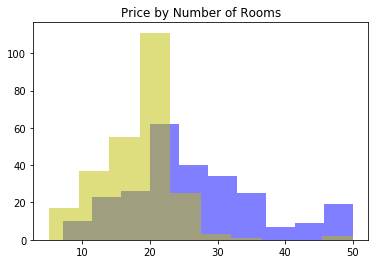

In [8]:
#plotting RM data in a histogram to determine how much the price changes based upon the amount of rooms.
plt.hist(df[df["RM"] > 6.2]["PRICE"], alpha=0.5, color='b')
plt.hist(df[df["RM"] < 6.2]["PRICE"], alpha=0.5, color='y')
plt.title("Price by Number of Rooms")

Text(0, 0.5, 'Price')

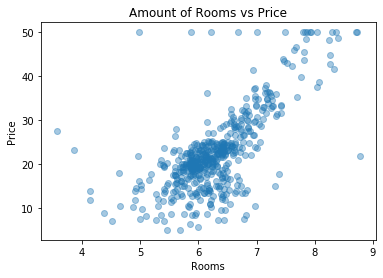

In [9]:
plt.scatter(df['RM'], df['PRICE'], alpha = 0.4)
plt.title("Amount of Rooms vs Price")
plt.xlabel("Rooms")
plt.ylabel("Price")

In the two above graphs, I display the strong correlation between the number of rooms and price of the houses. This is very clear in the histogram, in which there is little overlap, showing that the price ranges for the two amounts of rooms (<6.2, >6.2) are very different. However, I noticed a small overlap in which there was an area in which the price was very high despite having an average number of rooms below 6.2. This tells me that there must be someting special about this area that could use further investigation. 